In [1]:
import os
import pandas as pd
import numpy as np
from google.cloud import bigquery
import matplotlib.pyplot as plt

In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/piyush/Desktop/plane-detection-352701-90220d8b4de6.json'
client = bigquery.Client()

In [88]:
formated_query = f"""
            SELECT YEAR_MFR 
            FROM `plane-detection-352701.SPY_PLANE.FAA`
            WHERE COUNTRY = 'US'
            """

In [89]:
df = client.query(formated_query).to_dataframe()
df = df.dropna()

In [91]:
df['YEAR'] = pd.DatetimeIndex(df['YEAR_MFR']).year

In [ ]:
min_year=2000
max_year=2005
df = df[(df['YEAR'] >= min_year) & (df['YEAR'] <= max_year)]

In [92]:
df

,YEAR_MFR,YEAR
0,1949-01-01,1949
1,1933-01-01,1933
2,1939-01-01,1939
3,1934-01-01,1934
4,1937-01-01,1937
...,...,...
311858,1977-01-01,1977
311859,1977-01-01,1977
311860,1977-01-01,1977
311861,1977-01-01,1977


In [ ]:
buckets = 5
bins = np.linspace(min_year, max_year, buckets)
df['bins'] = pd.cut(df['YEAR'], bins=bins, include_lowest=True)

In [ ]:
plt.figure(figsize=(7, 8))
values, bins, bars = plt.hist(df['YEAR'], bins=buckets-1, edgecolor='white')
plt.title(f'Aircraft Registration between {min_year} and {max_year}')
plt.xlabel('Years')
plt.ylabel('Count of Registration')
plt.bar_label(bars, fontsize=10, color='black')
plt.margins(x=0.01, y=0.1)
plt.show()

---

# GeoPandas

In [93]:
import matplotlib.pyplot as plt
import geopandas

In [118]:
states = geopandas.read_file('/Users/piyush/Downloads/geopandas-tutorial-master/data/usa-states-census-2014.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [119]:
states = states.drop_duplicates()
# states[states['STUSPS'] == 'MA'].loc[29,'geometry'] == states[states['STUSPS'] == 'MA'].loc[52,'geometry']


In [122]:
states.sort_values('STUSPS')

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
41,01,01779775,0400000US01,01,AL,Alabama,00,131172403111,4594951242,Southeast,"POLYGON Z ((-88.46866 31.89386 0.00000, -88.46..."
20,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,Southeast,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.36..."
19,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,Southwest,"POLYGON Z ((-114.79968 32.59362 0.00000, -114...."
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
21,08,01779779,0400000US08,08,CO,Colorado,00,268426928342,1176085119,West,"POLYGON Z ((-109.05996 38.49999 0.00000, -109...."
23,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,Northeast,"POLYGON Z ((-73.69594 41.11526 0.00000, -73.48..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
39,10,01779781,0400000US10,10,DE,Delaware,00,5047093738,1398754502,Northeast,"POLYGON Z ((-75.77379 39.72220 0.00000, -75.75..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."


In [123]:
states = states.to_crs("EPSG:3395")

<AxesSubplot:>

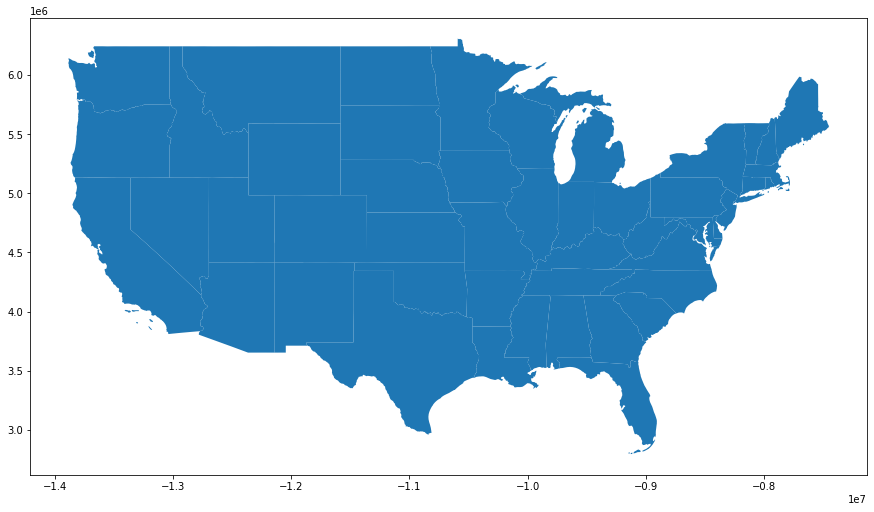

In [125]:
states.plot(figsize = (15,15))


<AxesSubplot:>

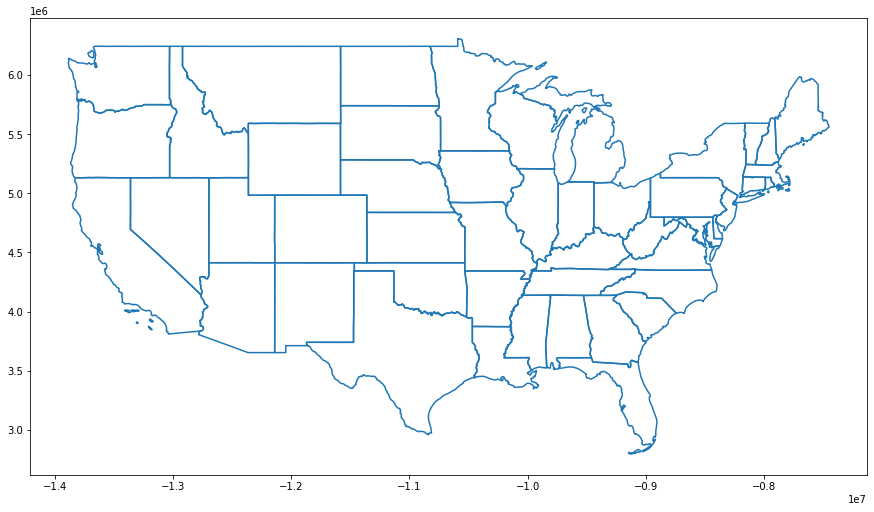

In [126]:
states.boundary.plot(figsize = (15,15))

In [187]:
formated_query = f"""
                    SELECT 
                    -- N_NUMBER, 
                    STATE AS STUSPS,
                    COUNT(*) AS COUNT
                    FROM `plane-detection-352701.SPY_PLANE.FAA` 
                    WHERE COUNTRY = 'US' AND STATE IN ('CA', 'DC', 'FL', 'GA', 'ID', 'IL', 'IA', 'KY', 'LA', 'MD', 'MI', 'MN', 'MO', 'NY', 'OR', 'TN', 'TX', 'VA', 'WI', 'AZ', 'AR', 'CO', 'IN', 'CT', 'NE')
                    GROUP BY
                    STATE
                    ORDER BY 1
                    """

In [188]:
df2 = client.query(formated_query).to_dataframe()
df2 = df2.dropna()

: 

In [166]:
df2.head()

,STUSPS,COUNT
0,AR,3645
1,AZ,8249
2,CA,28865
3,CO,7154
4,CT,2251


In [167]:
states2 = states.merge(df2, on='STUSPS')

In [159]:
state_name = states2['STUSPS'][:25]
list(state_name)

['CA',
 'DC',
 'FL',
 'GA',
 'ID',
 'IL',
 'IA',
 'KY',
 'LA',
 'MD',
 'MI',
 'MN',
 'MO',
 'NY',
 'OR',
 'TN',
 'TX',
 'VA',
 'WI',
 'AZ',
 'AR',
 'CO',
 'IN',
 'CT',
 'NE']

<AxesSubplot:>

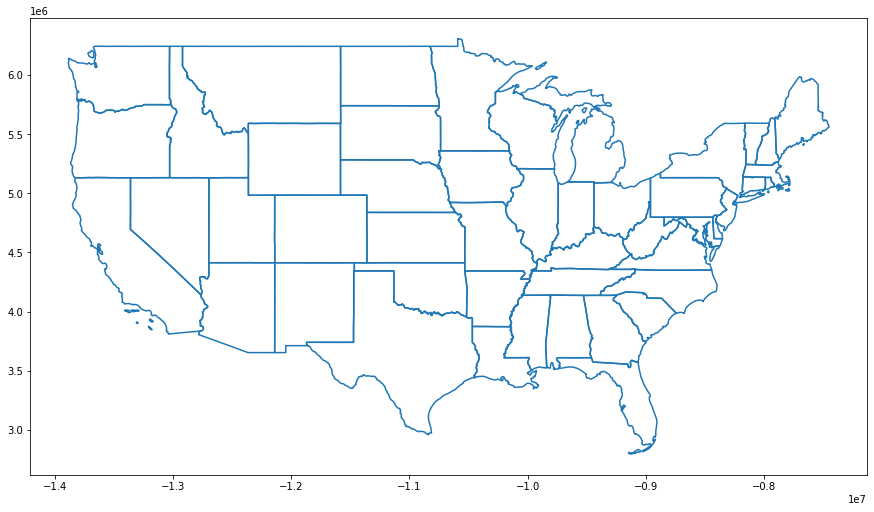

In [132]:
states.boundary.plot(figsize = (15,15))

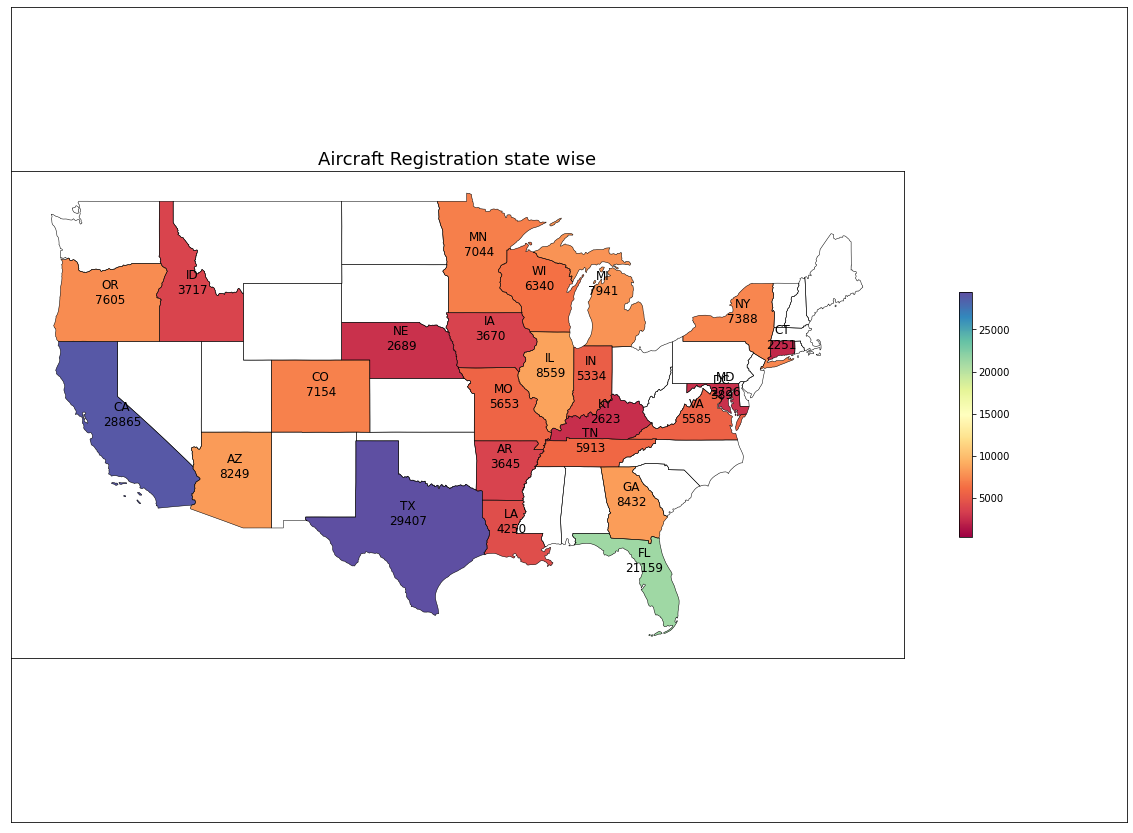

In [186]:
fig, ax = plt.subplots(1, 1, figsize=(20,15))
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax = fig.add_subplot()
plt.title(f'Aircraft Registration state wise', fontdict = {'fontsize' : 18})
states.boundary.plot(ax=ax, color='Black', linewidth=.5)
states2.plot(ax=ax, column = 'COUNT', cmap = 'Spectral', legend = True, legend_kwds={'shrink': 0.3})
states2.apply(lambda x: ax.annotate(text=x.STUSPS + "\n" + str(x.COUNT), xy=x.geometry.centroid.coords[0], ha='center', fontsize=12),axis=1)
# states.boundary.plot(ax=ax, color='Black', linewidth=.5)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


<AxesSubplot:>

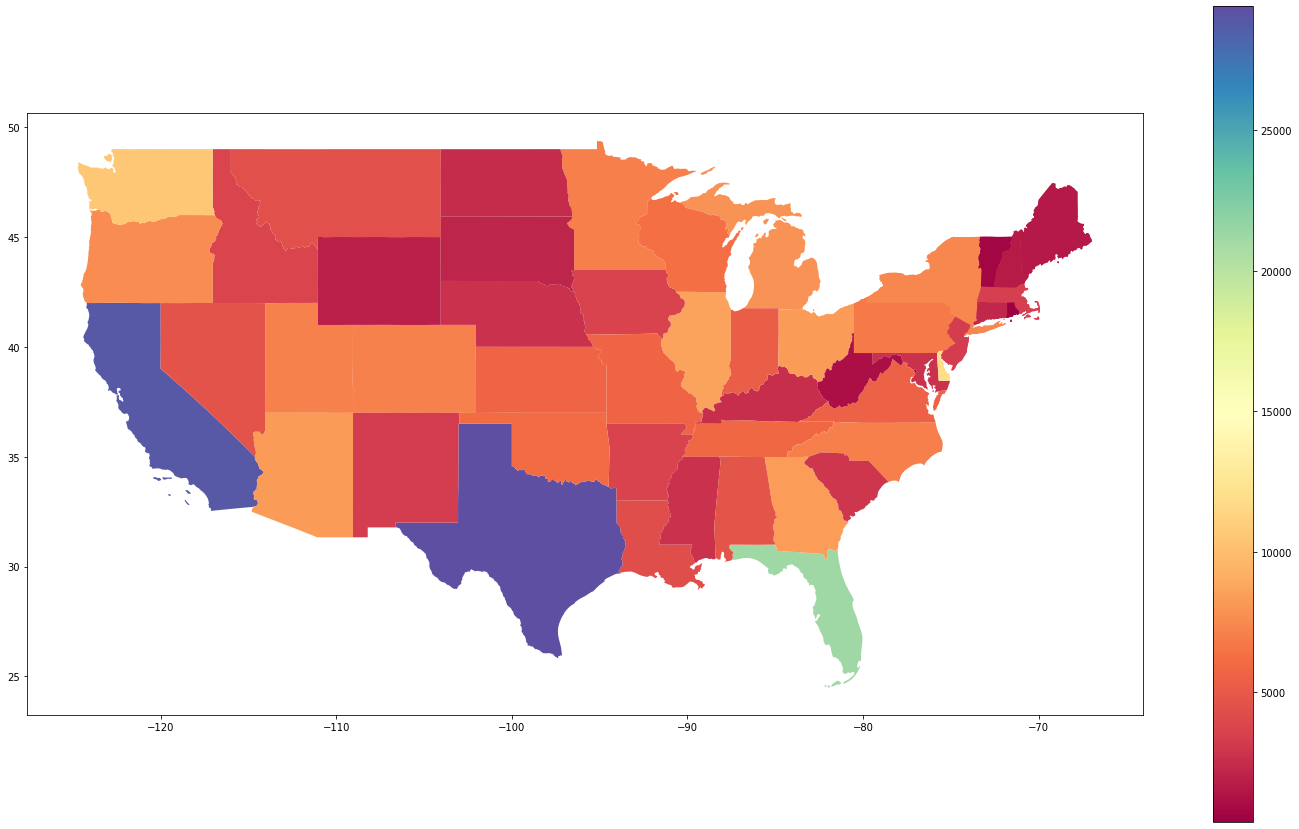

In [81]:
states.plot(column = 'COUNT', figsize = (25,15), cmap = 'Spectral', legend = True)

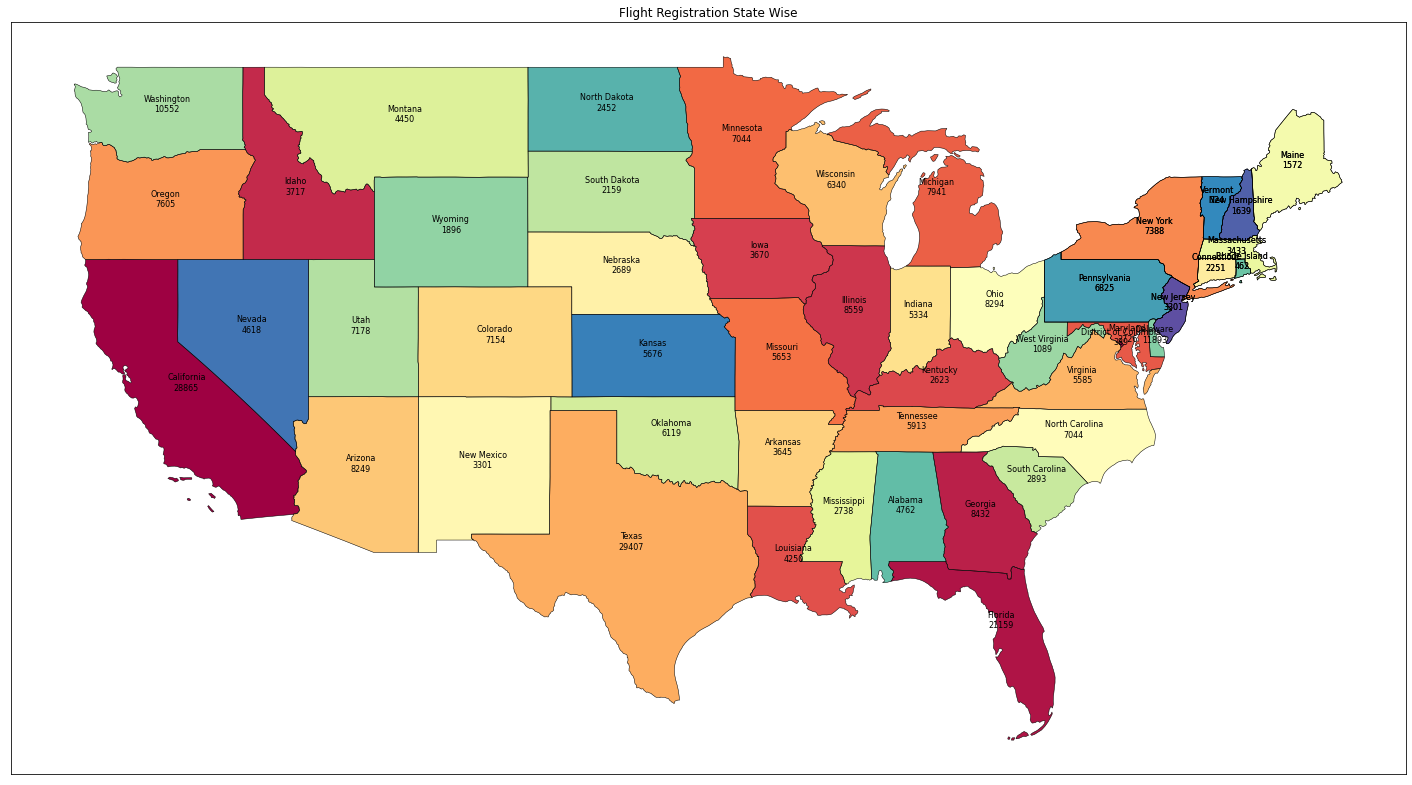

In [85]:
# states.plot(column = 'COUNT', figsize = (15,15), cmap = 'Spectral', legend = True)
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
states.apply(lambda x: ax.annotate(text=x.NAME + "\n" + str(x.COUNT), xy=x.geometry.centroid.coords[0], ha='center', fontsize=8),axis=1)
states.boundary.plot(ax=ax, color='Black', linewidth=.5)
states.plot(ax = ax, figsize = (25,15), cmap = 'Spectral', legend = True)
# states.plot(column = 'COUNT', figsize = (25,15), cmap = 'Spectral', legend = True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.title('Flight Registration State Wise')
plt.show()
# ax.text(-0.05, 0.5, 'DAMG7245', transform=ax.transAxes,
#         fontsize=20, color='gray', alpha=0.5,
#         ha='center', va='center', rotation='90')
# ax.text(-0.05, 0.5, 'DAMG7245', transform=ax.transAxes,
#         fontsize=20, color='gray', alpha=0.5,
#         ha='center', va='center', rotation='90')

<AxesSubplot:>

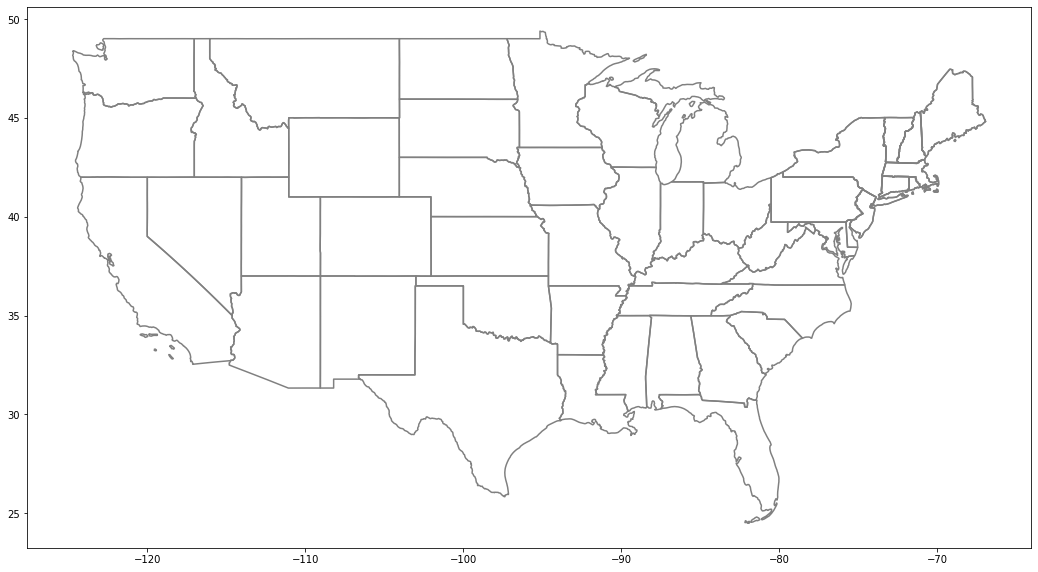

In [84]:
states.boundary.plot(figsize=(18, 12), color="Gray")

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
west.apply(lambda x: ax.annotate(
    s=x.NAME + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi", 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=14

In [ ]:
WITH faa AS (
SELECT N_NUMBER, SERIAL_NUMBER, STATE, YEAR_MFR, TYPE_REGISTRANT, TYPE_AIRCRAFT, TYPE_ENGINE, STATUS_CODE
FROM `plane-detection-352701.SPY_PLANE.FAA` faa
WHERE COUNTRY = 'US' 
-- AND STATE = '{state_code}'
AND STATE IN ('{state_code}')
),
reg AS (
SELECT ID, NAME FROM `plane-detection-352701.SPY_PLANE.TYPE_REGISTRANT`
),
type AS (
SELECT ID, NAME FROM `plane-detection-352701.SPY_PLANE.TYPE_AIRCRAFT` 
),
engine AS (
SELECT ID, NAME FROM `plane-detection-352701.SPY_PLANE.TYPE_ENGINE` 
),
registration AS (
SELECT ID, NAME FROM `plane-detection-352701.SPY_PLANE.STATUS_CODE` 
)

---
# Dashboard

In [1]:
import dash
from  dash import dcc, html
from fastapi import Header
from flask import Flask
import dash_bootstrap_components as dbc
import os
from dotenv import load_dotenv
from google.cloud import bigquery
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [12]:
# load_dotenv()
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/piyush/Desktop/plane-detection-352701-90220d8b4de6.json'
client = bigquery.Client()
sample_query = r"SELECT * FROM `plane-detection-352701.SPY_PLANE.logs`"
df = client.query(sample_query).to_dataframe()

In [18]:
df

,logtime,Username,Endpoint,response_code,logid,logdate
0,2022-07-01 14:34:50.797627+00:00,None,/planes_info_from_mfg_year,200,2177,2022-07-01
1,2022-07-01 14:36:36.646497+00:00,None,/planes_info_from_mfg_year,200,2178,2022-07-01
2,2022-07-01 14:39:41.502269+00:00,None,/planes_info_from_mfg_year,200,2179,2022-07-01
3,2022-07-01 14:51:16.718608+00:00,None,/planes_info_from_mfg_year,200,2180,2022-07-01
4,2022-07-01 14:53:03.893307+00:00,None,/planes_info_from_mfg_year,200,2181,2022-07-01
...,...,...,...,...,...,...
2076,2022-06-30 16:32:53.258045+00:00,None,/planes_info_from_mfg_year,200,2089,2022-06-30
2077,2022-06-30 16:36:01.433920+00:00,None,/planes_info_from_mfg_year,200,2090,2022-06-30
2078,2022-06-30 18:18:36.971228+00:00,None,/planes_info_from_mfg_year,200,2091,2022-06-30
2079,2022-07-01 14:04:19.340901+00:00,None,/planes_info_from_mfg_year,200,2174,2022-07-01


In [21]:
d = {'logdate': ['2022-06-20' , '2022-06-21' , '2022-06-22' , '2022-06-23' , '2022-06-24' , '2022-06-25' , '2022-06-26' , '2022-06-27' , '2022-06-28' , '2022-06-29' , '2022-06-30' , '2022-07-01' , '2022-06-20' , '2022-06-21' , '2022-06-22' , '2022-06-23' , '2022-06-24' , '2022-06-25' , '2022-06-26' , '2022-06-27' , '2022-06-28' , '2022-06-29' , '2022-06-30' , '2022-07-01'], 'Username': [ 'UserA' , 'UserA' , 'UserB' , 'UserF' , 'UserA' , 'UserA' , 'UserC' , 'UserA' , 'UserA' , 'UserE' , 'UserA' , 'UserD' , 'UserA' , 'UserE' , 'UserB' , 'UserA' , 'UserF' , 'UserE' , 'UserA' , 'UserA' , 'UserB' , 'UserB' , 'UserA' , 'UserD']}

In [22]:
d = {'logdate': ['2022-06-20' , '2022-06-21' , '2022-06-22' , '2022-06-23' , '2022-06-24' , '2022-06-25' , '2022-06-26' , '2022-06-27' , '2022-06-28' , '2022-06-29' , '2022-06-30' , '2022-07-01' , '2022-06-20' , '2022-06-21' , '2022-06-22' , '2022-06-23' , '2022-06-24' , '2022-06-25' , '2022-06-26' , '2022-06-27' , '2022-06-28' , '2022-06-29' , '2022-06-30' , '2022-07-01'], 'Username': [ 'UserA' , 'UserA' , 'UserB' , 'UserF' , 'UserA' , 'UserA' , 'UserC' , 'UserA' , 'UserA' , 'UserE' , 'UserA' , 'UserD' , 'UserA' , 'UserE' , 'UserB' , 'UserA' , 'UserF' , 'UserE' , 'UserA' , 'UserA' , 'UserB' , 'UserB' , 'UserA' , 'UserD']}
df = pd.DataFrame(data=d)
df

,logdate,Username
0,2022-06-20,UserA
1,2022-06-21,UserA
2,2022-06-22,UserB
3,2022-06-23,UserF
4,2022-06-24,UserA
5,2022-06-25,UserA
6,2022-06-26,UserC
7,2022-06-27,UserA
8,2022-06-28,UserA
9,2022-06-29,UserE


In [23]:
out = pd.crosstab(df['logdate'],df['Username']).reset_index()

In [24]:
out

Username,logdate,UserA,UserB,UserC,UserD,UserE,UserF
0,2022-06-20,2,0,0,0,0,0
1,2022-06-21,1,0,0,0,1,0
2,2022-06-22,0,2,0,0,0,0
3,2022-06-23,1,0,0,0,0,1
4,2022-06-24,1,0,0,0,0,1
5,2022-06-25,1,0,0,0,1,0
6,2022-06-26,1,0,1,0,0,0
7,2022-06-27,2,0,0,0,0,0
8,2022-06-28,1,1,0,0,0,0
9,2022-06-29,0,1,0,0,1,0


In [19]:
df.dtypes

logtime          datetime64[ns, UTC]
Username                      object
Endpoint                      object
response_code                  int64
logid                          int64
logdate                       object
dtype: object

In [15]:
df['logtime'] = pd.to_datetime(df['logtime'])

In [16]:
df['logtime'] = pd.to_datetime(df['logtime'], format='%d/%m/%y %H:%M')

In [17]:
df['logdate'] = pd.to_datetime(df['logtime']).dt.strftime('%Y-%m-%d')

In [ ]:
c = df['err'].eq("ERROR")
g = (df[['payment','country','email']].assign(num_errors=c,
                   **pd.get_dummies(df[['type']],prefix=['num'])).groupby(['payment','country']))

out = g.size().to_frame("number_payments").join([g.sum(), g['email'].nunique().to_frame("unique_emails")]).reset_index()
out['num_errors_per_unique_email'] = out['num_errors'] / out['unique_emails']
out['num_type1_per_unique_email'] = out['num_type1'] / out['unique_emails']
out['num_type2_per_unique_email'] = out['num_type2'] / out['unique_emails']
out

In [24]:
a = df['Username'].eq("abhijit")
j = df['Username'].eq("jui")
p = df['Username'].eq("piyush")

In [52]:
df['response_code'].value_counts()

204    262
200    251
103    241
101    239
500    227
104    226
102    225
400    225
420      2
690      1
Name: response_code, dtype: int64

In [27]:
g = (df[['logdate']].assign(jui=j, **pd.get_dummies(df['Username'])).groupby(['logdate']))

TypeError: pandas.core.frame.DataFrame.assign() got multiple values for keyword argument 'jui'

In [20]:
df.groupby('logdate')[['Username']].count()

,Username
logdate,
2022-06-20,507
2022-06-21,422
2022-06-22,473
2022-06-23,490
2022-06-24,2
2022-06-25,0
2022-06-26,0
2022-06-27,0
2022-06-28,9


In [38]:
df.groupby('logdate').agg({'Username': 'count'}).reset_index()

,logdate,Username
0,2022-06-20,507
1,2022-06-21,422
2,2022-06-22,473
3,2022-06-23,490
4,2022-06-24,2
5,2022-06-25,0


In [3]:
client = bigquery.Client()
sample_query = r"""

with jui as (
  SELECT
  DATE(logtime) AS date,
  COUNT(*) AS JUI
FROM `plane-detection-352701.SPY_PLANE.logs`
where Username = 'jui'
GROUP BY DATE(logtime)
), abhi as (
  SELECT
  DATE(logtime) AS date,
  COUNT(*) AS ABHI
FROM `plane-detection-352701.SPY_PLANE.logs`
where Username = 'abhijit'
GROUP BY DATE(logtime)
), piyush as (
  SELECT
  DATE(logtime) AS date,
  COUNT(*) AS PIYUSH
FROM `plane-detection-352701.SPY_PLANE.logs`
where Username = 'piyush'
GROUP BY DATE(logtime)
)

SELECT j.date, JUI, ABHI, PIYUSH
FROM jui j
FULL OUTER JOIN abhi a ON j.date = a.date
FULL OUTER JOIN piyush p ON j.date = p.date
ORDER BY 1 ASC
"""
df1 = client.query(sample_query).to_dataframe()

In [48]:
df["response_code"].eq(200)

0       False
1       False
2       False
3       False
4       False
        ...  
1894    False
1895    False
1896    False
1897    False
1898    False
Name: response_code, Length: 1899, dtype: bool

In [45]:
df1.dtypes

date      object
JUI        int64
ABHI       int64
PIYUSH     int64
dtype: object

In [53]:
df

,logtime,Username,Endpoint,response_code,logid,logdate
0,2022-06-24 19:34,None,Abhi,690,103,2022-06-24
1,2022-06-25 01:07,None,hello,101,104,2022-06-25
2,2022-06-21 15:18,jui,webpage,101,183,2022-06-21
3,2022-06-21 17:19,jui,webpage,101,422,2022-06-21
4,2022-06-21 22:36,jui,webpage,102,361,2022-06-21
...,...,...,...,...,...,...
1894,2022-06-22 18:14,abhijit,/data/registrant,500,1176,2022-06-22
1895,2022-06-20 21:38,abhijit,/data/registrant,500,1956,2022-06-20
1896,2022-06-23 13:31,abhijit,/data/registrant,500,1841,2022-06-23
1897,2022-06-20 11:11,abhijit,/data/registrant,500,1277,2022-06-20


In [59]:
df[df['Endpoint'].str.contains("/data/")].shape[0]

985

In [4]:
df1

,date,JUI,ABHI,PIYUSH
0,2022-06-20,175,164,168
1,2022-06-21,140,146,136
2,2022-06-22,168,164,141
3,2022-06-23,154,164,172


In [40]:
client = bigquery.Client()
sample_query = r"""SELECT * FROM `plane-detection-352701.SPY_PLANE.logs`"""
df = client.query(sample_query).to_dataframe()

In [26]:
df1

,logtime,Username,Endpoint,response_code,logid
0,2022-07-01 12:34:50.552556+00,None,/planes_info_from_mfg_year,103,2114
1,2022-07-01 12:35:33.083029+00,None,/planes_info_from_mfg_year,103,2115
2,2022-07-01 12:36:02.393647+00,None,/planes_info_from_mfg_year,103,2116
3,2022-07-01 12:37:21.271262+00,None,/planes_info_from_mfg_year,103,2119
4,2022-07-01 12:41:32.634366+00,None,/planes_info_from_mfg_year,103,2120
...,...,...,...,...,...
2098,2022-07-01 15:45:46.428518+00,kunjiraman.a@northeastern.edu,/number_of_flights,200,2201
2099,2022-07-01 15:45:23.128485+00,kunjiraman.a@northeastern.edu,/number_of_flights,400,2199
2100,2022-07-01 15:46:48.016098+00,kunjiraman.a@northeastern.edu,/number_of_flights,200,2203
2101,2022-07-01 15:43:06.459935+00,kunjiraman.a@northeastern.edu,/number_of_flights,200,2198


In [41]:
df['logtime'] = pd.to_datetime(df['logtime'])
df['logtime'] = pd.to_datetime(df['logtime'], format='%d/%m/%y %H:%M')
df['logdate'] = pd.to_datetime(df['logtime']).dt.strftime('%Y-%m-%d')

In [38]:
df

,logtime,Username,Endpoint,response_code,logid
0,2022-06-29 19:51:54.378949+00,None,/plot/map,200,2050
1,2022-06-30 03:32:43.883856+00,None,/plot/map,200,2078
2,2022-06-30 03:33:04.619085+00,None,/plot/map,200,2079
3,2022-06-30 02:14:47.483785+00,p.anand@email.com,/plot/map,200,2056
4,2022-06-30 02:09:34.474466+00,p.anand@email.com,/plot/histogram,200,2054
...,...,...,...,...,...
2098,2022-07-01 00:27:38.097356+00,p.anand@email.com,/data/registrant,200,2093
2099,2022-06-30 16:29:05.347833+00,None,/planes_info_from_mfg_year,200,2088
2100,2022-06-30 16:32:53.258045+00,None,/planes_info_from_mfg_year,200,2089
2101,2022-06-30 16:36:01.433920+00,None,/planes_info_from_mfg_year,200,2090


In [42]:
df1 = pd.crosstab(df['logdate'],df['Username']).reset_index()

In [43]:
df1

Username,logdate,Abhijit,abhijit,adina.n@northeastern.edu,anand.pi@northeastern.edu,chavan.ju@northeastern.edu,jiang.zif@northeastern.edu,jui,kunjiraman.a@northeastern.edu,p.anand@email.com,piyush,s.krishnamurthy@northeastern.edu,shah.parth3@northeastern.edu,test
0,2022-06-20,0,164,0,0,0,0,175,0,0,168,0,0,0
1,2022-06-21,0,146,0,0,0,0,140,0,0,136,0,0,0
2,2022-06-22,0,164,0,0,0,0,168,0,0,141,0,0,0
3,2022-06-23,0,164,0,0,0,0,154,0,0,172,0,0,0
4,2022-06-24,2,0,0,0,0,0,0,0,0,0,0,0,0
5,2022-06-28,0,0,0,0,0,0,0,0,8,0,0,0,1
6,2022-06-30,0,0,0,0,0,0,0,0,33,0,0,0,0
7,2022-07-01,0,0,1,4,1,1,0,8,2,0,1,1,0
